In [6]:
import pandas as pd
from random import uniform, normalvariate, randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [7]:
# Generate random data for equation 4x + 5

def f(x):
    return 4*x + 5

In [8]:
data = pd.DataFrame(columns=["x","y"])

In [9]:
#Generate 1000 data points

for i in range(1000):
    x_axis = round(uniform(1,10),2)
    y_axis = f(x_axis)
    ydash_axis = y_axis + normalvariate(12,2)
    data = data.append(pd.DataFrame(columns=["x","y"], data=[[x_axis, ydash_axis]]))

In [10]:
data.head(5)

,x,y
0,3.91,32.271378
0,3.45,32.115444
0,6.01,39.979591
0,4.65,34.273345
0,9.85,55.591528


In [11]:
# Get input data
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [12]:
# Build the model using hill climbing optimization technique
# Linear equation to be formed is y = mx + b
m = 0
b = 0

In [13]:
epochs = 40000 # number of iterations
n = float(len(X))  # Number of elements in X
best_loss = 10000000000000.0  # Initialize with a really large value

In [14]:
for i in range(epochs):
    #Perform hill climbing
    
    m_adjust = normalvariate(0, 1)
    b_adjust = normalvariate(0, 1)
    
    m += m_adjust
    b += b_adjust
    
    #Calculate loss
    new_loss = 1/n * sum((Y - (m*X + b))**2)

     # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        best_loss = new_loss
    else:
        m -= m_adjust
        b -= b_adjust

    if i % 1000 == 0:
        print(m, b)
    
print(m,b)

0.14545133844859362 0.7315228264663929
3.984726797813373 17.130548790819624
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005431419264514 17.009405593685507
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.005771531877979 17.06067490583942
4.001209930139417 17.08535291281293
4.001209930139417 17.08535291281293
4.001209930139417 17.08535291281293
4.001209930139417 17.08535291281293
4.001209930139417 17.08535291281293
4.001209930139417 17.08535291281293
4.0012099301394

In [15]:
5.25*3.959888369313459 + 17.220443732246096

38.00985767114176

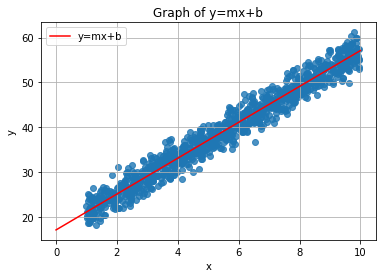

In [16]:
#Plot training data
sns.regplot(x="x", y="y", data=data)

#Plot model
x = np.linspace(0,10,num=100)
y = m*x+b
plt.plot(x, y, 'r', label='y=mx+b')
plt.title('Graph of y=mx+b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()

plt.show()